<a href="https://colab.research.google.com/github/shbnm93/Data-Science-Projects/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: this is a sentiment analysis program that parses the tweets fetched from twitter using python

In [ ]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#get the data
#log = pd.read_csv('Login.csv')

In [ ]:
#twitter API credentials
#consumerKey = log['Key'][0]
#consumerSecret = log['Key'][1]
#accessToken = log['Key'][2]
#accessTokenSecret = log['Key'][3]

In [ ]:
consumerKey = 'Blin1kDvlp7TP5lMBjMp6jX14'
consumerSecret = 'PuF6pi8yj89t7G7D4G9AQSRQg0BqdTgPcm8MeEojoaBT6g9QKO'
accessToken = '1612462442-xJASa0H919GVvqmRBO6fA0ixthkZK3uvcZel7lT'
accessTokenSecret = 'fVoI4U0GQhb09gkPaYxPQqjSnhd338pWYkQUEgxGMzltf'

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
# extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, language = "en", tweet_mode = "extended")

# print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) I’m optimistic about our ability to prevent the next pandemic. We have learned so much from COVID, and the innovations have been tremendous. https://t.co/QDfUnEbYeJ

2) The Global Fund is one of the best investments in global health. Fully funding its programs for the next 3 years is critical to ending HIV, TB, and malaria while helping ensure COVID-19 is the last pandemic. https://t.co/t4N4LhlaUb

3) At the end of the day, Paul’s most lasting impact can be found in the patients he loved so dearly—all of the people who are alive today because he dedicated his life to helping them. https://t.co/W8jVF6rcS0

4) His work will continue through Partners in Health, the incredible organization he co-founded. It is a phenomenal legacy.

5) Paul was never happier than when he was caring for patients in one of the clinics he helped create. My heart goes out to his family and friends, his colleagues, and all the people whose lives he touched.



In [ ]:
#create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# show the first 5 rows of data
df.head()

,Tweets
0,I’m optimistic about our ability to prevent th...
1,The Global Fund is one of the best investments...
2,"At the end of the day, Paul’s most lasting imp..."
3,His work will continue through Partners in Hea...
4,Paul was never happier than when he was caring...


In [ ]:
#clean the text

#create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)    #removed @mentions
  text = re.sub(r'#', '', text)  #removing the '#' symbol
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S '+ '', text)  # removing the hyper link

  return text


#cleaning the text

df['Tweets']= df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

TypeError: ignored

In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,I’m optimistic about our ability to prevent th...,0.400000,0.177778
1,The Global Fund is one of the best investments...,0.194444,0.166667
2,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000
3,His work will continue through Partners in Hea...,0.700000,0.700000
4,Paul was never happier than when he was caring...,0.000000,0.000000
...,...,...,...
95,The bipartisan Infrastructure Investment and J...,0.500000,0.300000
96,Data sharing and global collaboration move us ...,0.227273,0.068182
97,"We still have a lot of work to do, but the con...",0.000000,0.000000
98,Data on student outcomes can help institutiona...,0.431602,0.226623


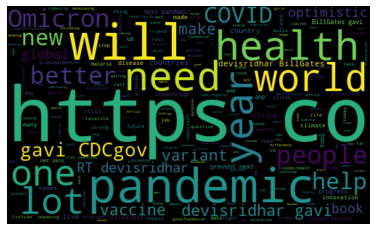

In [ ]:
from pandas.core.common import random_state
# plot the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I’m optimistic about our ability to prevent th...,0.400000,0.177778,Positive
1,The Global Fund is one of the best investments...,0.194444,0.166667,Positive
2,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000,Positive
3,His work will continue through Partners in Hea...,0.700000,0.700000,Positive
4,Paul was never happier than when he was caring...,0.000000,0.000000,Neutral
...,...,...,...,...
95,The bipartisan Infrastructure Investment and J...,0.500000,0.300000,Positive
96,Data sharing and global collaboration move us ...,0.227273,0.068182,Positive
97,"We still have a lot of work to do, but the con...",0.000000,0.000000,Neutral
98,Data on student outcomes can help institutiona...,0.431602,0.226623,Positive


In [ ]:
# print all of the positive tweets
 j = 1
 sortedDF = df.sort_values(by=['Polarity'])
 for i in range(0, sortedDF.shape[0]):
   if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

IndentationError: ignored

In [ ]:
#print the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity', ascending = 'False'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j + 1

SyntaxError: ignored

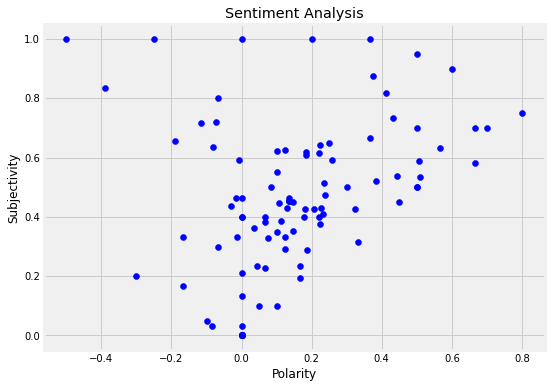

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

66.0

In [ ]:
#get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0] * 100), 1)

18.0

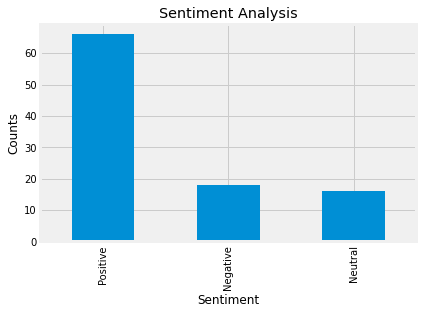

In [ ]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()